### Îî•Îü¨Îãù CNN ÌîÑÎ°úÏ†ùÌä∏ Î≥¥Í≥†ÏÑú

Í∞ÄÏúÑÎ∞îÏúÑÎ≥¥ Î∂ÑÎ•ò
- ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏ + Î∂ÑÎ•òÍ∏∞(Ï†ÄÏö©Îüâ)
- Ïã∏Ïù¥ÌÅ¥ Î∞è ÌõàÎ†® Î™®Îç∏ Î≥Ñ ÎÇ¥Ïö© Î≥¥Í≥†  

Îç∞Ïù¥ÌÑ∞ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Rock_Scissors_Paper/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 2188 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_images(generator, ncols=8):

    random_indices = np.random.choice(len(generator.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []

    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(target_names[index])


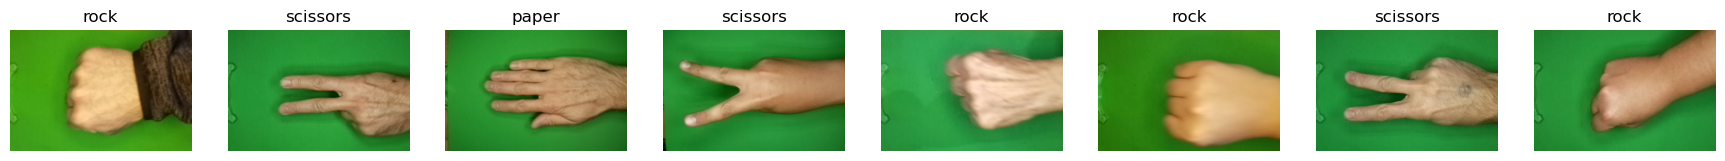

In [3]:
show_images(generator)

---
### Cycle 1
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Xception`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
</code>

- Total params : 21,066,683
- Albumentation Ï†ÅÏö© X
- Learning_rate : default
- ÌõàÎ†® Epoch : 10 / 10


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>1.0000</td>
        <td>1.0000</td>
        <td>0.9893</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.0001</td>
        <td>0.0004</td>
        <td>0.0452</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/rsp/cycle1_history.png" width="500px">

- ÏòàÏ∏° ÏàòÌñâ

<img src="./images/rsp/cycle1_prediction.png" width="1200px">

- ÏûÑÏùò ÏòàÏ∏° ÏàòÌñâÌïú Í≤∞Í≥º, 8Í∞ú Ï§ëÏóê 8Í∞ú Ï†ÑÎ∂Ä Îã§ Ï£ºÎ®πÏúºÎ°ú ÏòàÏ∏°ÏùÑ ÏûòÎ™ªÌñàÏäµÎãàÎã§.
- Ï°∞Í∏àÎçî Ï†ïÌôïÎèÑÎ•º Ïò¨Î¶¨Í∏∞ ÏúÑÌï¥ `IMAGE_SIZE = 64`Î°ú Ï§ÑÏù¥Í≥† ÌõàÎ†®ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

#### üëâÏò§Î•ò Î∞úÍ≤¨
- Ïù¥ÎØ∏ÏßÄÎ•º Í∞ÄÏ†∏Ïò¨ Îïå, Ìï¥Îãπ ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏Ïóê ÎßûÎäî preprocess_inputÏùÑ Ï†ÅÏö©ÌïòÏßÄ ÏïäÏïÑÏÑú Ï†êÏàòÎäî ÎÜíÏïòÏßÄÎßå, Ï†úÎåÄÎ°ú ÏòàÏ∏°ÏùÑ ÌïòÏßÄ Î™ªÌñàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÏäµÎãàÎã§.
- preprocess_inputÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îã§Ïãú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏòÄÏùÑ Îïå Ï†ïÌôïÌûà ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.



---
### Cycle 2
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Xception`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
</code>

- Total params : 21,066,683
- Albumentation Ï†ÅÏö© X
- Learning_rate : default
- ÌõàÎ†® Epoch : 10 / 10


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9999</td>
        <td>1.0000</td>
        <td>1.0000</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.0008</td>
        <td>0.0001</td>
        <td>0.0021</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/rsp/cycle2_history.png" width="500px">

- ÏòàÏ∏° ÏàòÌñâ

> ÏòàÏ∏° ÏàòÌñâ Í≤∞Í≥º, Train, Validation, Test Ï†êÏàò Î™®Îëê ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

<img src="./images/rsp/cycle2_prediction.png" width="1200px">

> Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°ÏùÑ ÌïòÏòÄÏùåÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§.

---
- Ïô∏Î∂Ä Ïù¥ÎØ∏ÏßÄ ÏòàÏ∏° ÏàòÌñâ

<img src="./images/rsp/cycle2_pre_prediction_from_web.png" width="1200px">
<img src="./images/rsp/cycle2_prediction_from_web.png" width="500px">

**Ïô∏Î∂Ä Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ Ïûò ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.**
> ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏Í∞Ñ ÎπÑÍµêÎ•º ÏúÑÌï¥ MobileNetÏúºÎ°ú ÌõàÎ†®ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

---
### Cycle 3
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `MobileNet`
- ÏùºÎ∞òÌôîÎ•º ÏúÑÌï¥ ÌõàÎ†® Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º 224Î°ú Ï°∞Ï†ïÌï©ÎãàÎã§.
- ÎòêÌïú AlbumentationÎèÑ Í∞ôÏù¥ Ï†ÅÏö©Ìï©ÎãàÎã§.
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
</code>

- Ï†ÅÏö©Ìïú Albumentation

<code>
    aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)])
</code>

- Total params : 2,643,187
- Learning_rate : default
- ÌõàÎ†® Epoch : 6 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9936</td>
        <td>0.8029</td>
        <td>0.8151</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.0238</td>
        <td>2.8631</td>
        <td>2.0914</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/rsp/cycle3_history.png" width="500px">

> historyÎ•º ÌôïÏù∏ÌïòÏòÄÏùÑ Îïå, val_lossÍ∞íÏù¥ Ï§ÑÏñ¥Îì§ÏóàÎã§Í∞Ä Îã§Ïãú Ï¶ùÍ∞ÄÌïòÏòÄÍ∏∞Ïóê ÌõàÎ†®Ïù¥ Ï°∞Í∏∞ Ï¢ÖÎ£åÎêòÏóàÏùåÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.

- ÏòàÏ∏° ÏàòÌñâ
<img src="./images/rsp/cycle3_prediction.png" width="1200px">

> ÏûÑÏùò ÏòàÏ∏° ÏàòÌñâÌïú Í≤∞Í≥º, 8Í∞ú Ï§ëÏóê 7Í∞úÎäî Ï†ïÌôïÌûà ÏòàÏ∏°ÌïòÏòÄÏùåÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§.


- Ïô∏Î∂Ä Ïù¥ÎØ∏ÏßÄ ÏòàÏ∏° ÏàòÌñâ

<img src="./images/rsp/cycle3_prediction_from_web.png" width="1200px">

---
### Score Per Cycles

<img src="./images/rsp/cycle_per_score.png" width="1200px">

### Ï†ïÎ¶¨
- Í∞Å Cycle Î≥Ñ Ï†êÏàòÎ•º Î≥¥ÏïòÏùÑ Îïå, Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º Ï§ÑÏù∏ XceptionÏóêÏÑúÎäî ÌÅ¨Í≤å Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏïòÏäµÎãàÎã§.
- Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º Ï§ÑÏù∏ Cycle 2ÏóêÏÑúÎäî Validation LossÍ∞Ä Ï§ÑÏóàÍ≥†, Test Loss Ï†êÏàò ÎòêÌïú ÏïÑÏ£º Ï°∞Í∏àÏùÄ Ï§ÑÏóàÏäµÎãàÎã§.
- ÌïòÏßÄÎßå ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º ÏÇ¥Ìé¥Î≥¥ÏïòÏùÑ ÎñÑ, Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Í∞ØÏàòÍ∞Ä ÏïΩ 1200Ïû• Ï†ïÎèÑÎ°ú Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ ÏàòÏóê,  
  ÌÅ¨Í∏∞Îäî 300X200Ïù¥Í≥† Ï¥àÎ°ùÏÉâ Î∞∞Í≤ΩÏóê ÏÜêÏúºÎ°ú Í∞ÄÏúÑ, Î∞îÏúÑ, Î≥¥Îßå ÎÇòÌÉÄÎÇ∏ Ïù¥ÎØ∏ÏßÄÏòÄÏäµÎãàÎã§.
- Ïù¥Îäî Í≥ºÎèÑÌïòÍ≤å ÏùºÎ∞òÌôî ÎêòÏóàÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÌåêÎã®ÌñàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú, Cycle 3ÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º 224Î°ú ÎäòÎ¶¨Í≥†, Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Í∏∞Î≤ïÏùÑ Ïù¥Ïö©ÌïòÏó¨ Í≥ºÌïú ÏùºÎ∞òÌôîÎ•º Î∞©ÏßÄÌïòÍ≥†  
  XceptionÎ≥¥Îã§Îäî Ï°∞Í∏àÎçî ÏÜåÍ∑úÎ™® Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÌï©Ìïú MobileNetÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌõàÎ†®ÏùÑ ÏßÑÌñâÌñàÏäµÎãàÎã§.
- ÌõàÎ†®ÏùÑ ÏßÑÌñâÌïú Í≤∞Í≥º, Ï†êÏàòÍ∞Ä Îã§ÏÜå Îñ®Ïñ¥ÏßêÍ≥º ÎèôÏãúÏóê Loss Í∞í ÎòêÌïú ÎÇòÌÉÄÎÇòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏúºÎÇò, Í≥ºÌïú ÏùºÎ∞òÌôîÎ•º Î∞©ÏßÄÌïòÏòÄÏùåÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.

### üö©ÎäêÎÇÄ Ï†ê

1. Î™®Îç∏ ÏÑ†ÌÉùÍ≥º ÏÑ±Îä• ÎπÑÍµê:

- XceptionÍ≥º MobileNetÏùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥¥Î©¥ÏÑú, Î™®Îç∏Ïùò Íµ¨Ï°∞ÏôÄ Î≥µÏû°ÏÑ±Ïù¥ ÏÑ±Îä•Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ ÏßÅÏ†ë ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.
- XceptionÏùÄ Îçî ÌÅ∞ Î™®Îç∏Î°ú, Îçî ÎßéÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ Ï¥àÍ∏∞ÏóêÎäî ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏúºÎÇò, ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Í≥ºÏ†ÅÌï©(overfitting)Ïùò ÏúÑÌóòÏù¥ ÏûàÏùåÏùÑ ÏïåÍ≤å ÎêòÏóàÏäµÎãàÎã§.
- Î∞òÎ©¥, MobileNetÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏûëÏùÄ Î™®Îç∏Î°ú, Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï(augmentation) Í∏∞Î≤ïÍ≥º Ìï®Íªò ÏÇ¨Ïö©ÌñàÏùÑ Îïå Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏù¥Í≥† ÏùºÎ∞òÌôîÎ•º Í∞úÏÑ†ÌïòÎäî Îç∞ Ìö®Í≥ºÏ†ÅÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.

2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÏôÄ augmentationÏùò Ï§ëÏöîÏÑ±:

- Cycle 1ÏóêÏÑú ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏Ïóê ÎßûÎäî preprocess_inputÏùÑ Ï†ÅÏö©ÌïòÏßÄ ÏïäÏïÑ ÏûòÎ™ªÎêú ÏòàÏ∏°ÏùÑ ÌñàÎçò Í≤ΩÌóòÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Ïùò Ï§ëÏöîÏÑ±ÏùÑ Îã§Ïãú ÌïúÎ≤à ÏÉÅÍ∏∞ÏãúÏºúÏ£ºÏóàÏäµÎãàÎã§.
- Cycle 3ÏóêÏÑú AlbumentationÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Í∏∞Î≤ïÏùÑ Ï†ÅÏö©Ìï®ÏúºÎ°úÏç®, Î™®Îç∏Ïù¥ Îçî ÏùºÎ∞òÌôîÎêú Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÍ≤å ÎêòÏóàÏäµÎãàÎã§. Ïù¥Îäî ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Îäî Îç∞ Îß§Ïö∞ Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌñàÏäµÎãàÎã§.
